In [1]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
#reading dataset
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#cheching the shape
df.shape

(1599, 12)

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# EDA

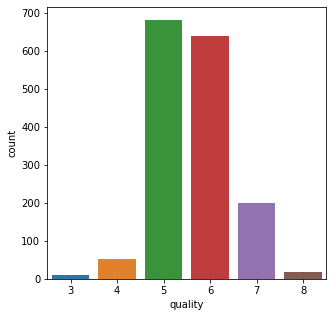

In [6]:
#plotting quality-count figure
plt.figure(figsize=(5,5))
sns.countplot(df['quality'])
plt.show()

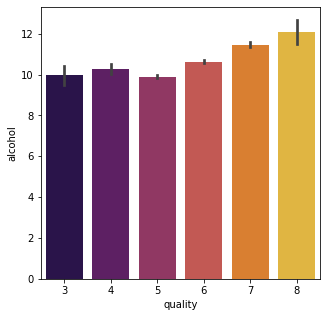

In [7]:
#plotting quality-alcohol figure
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y= 'alcohol', data=df, palette='inferno')
plt.show()

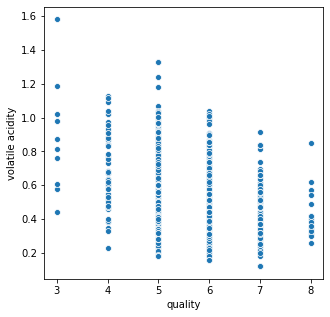

In [8]:
#plotting pH-citric acid figure to check is alcohol is basic or acidic
plt.figure(figsize=(5,5))
sns.scatterplot(x='quality', y= 'volatile acidity', data=df)
plt.show()

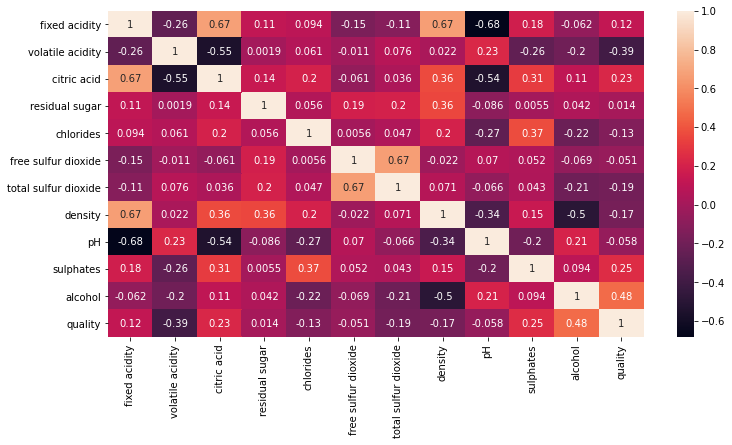

In [9]:
#plotting the heatmap to see the coo-realtion
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Data Preprocessing

In [10]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [11]:
#applying lambda function to classify wine as good or bad
df['quality']=df['quality'].apply(lambda x : 1 if x > 6.5 else 0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


0    1382
1     217
Name: quality, dtype: int64


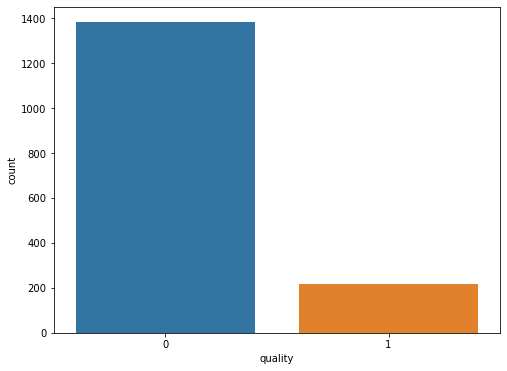

In [12]:
print(df['quality'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df['quality'])

In [13]:
#Independent and dependent features
x=df.drop(['quality'], axis=1)
y=df['quality']

In [14]:
#oversampling (handling imbalanced dataset)
from imblearn.over_sampling import SMOTE
os=SMOTE()
x, y=os.fit_resample(x,y)

In [15]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=30)

In [16]:
#to scale down value
from sklearn.preprocessing import StandardScaler
stdscale=StandardScaler()
x_train=stdscale.fit_transform(x_train)
x_test=stdscale.transform(x_test)

In [17]:
from sklearn.metrics import accuracy_score

# ML MODELS

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [19]:
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
print(dt.score(x_train,y_train))
prediction_dt = dt.predict(x_test)
score=accuracy_score(y_test, prediction_dt)
print(score)

1.0
0.8933092224231465


In [20]:
lr=LogisticRegression()
lr.fit(x_train, y_train)
print(lr.score(x_train,y_train))
prediction_lr = lr.predict(x_test)
score=accuracy_score(y_test, prediction_lr)
print(score)

0.8186341022161918
0.7992766726943942


In [21]:
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
print(rf.score(x_train,y_train))
prediction_rf = rf.predict(x_test)
score=accuracy_score(y_test, prediction_rf)
print(score)

1.0
0.945750452079566


In [22]:
svm=SVC()
svm.fit(x_train, y_train)
print(svm.score(x_train,y_train))
prediction_svm = svm.predict(x_test)
score=accuracy_score(y_test, prediction_svm)
print(score)

0.903663500678426
0.8716094032549728


In [23]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train, y_train)
print(nb.score(x_train,y_train))
prediction_nb = nb.predict(x_test)
score=accuracy_score(y_test, prediction_nb)
print(score)

0.7969244685662596
0.7956600361663653


In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
print(knn.score(x_train,y_train))
prediction_knn = knn.predict(x_test)
score=accuracy_score(y_test, prediction_knn)
print(score)

0.9181365897783809
0.8752260397830018


In [25]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train, y_train)
print(etc.score(x_train,y_train))
prediction_etc = etc.predict(x_test)
score=accuracy_score(y_test, prediction_etc)
print(score)

1.0
0.9439421338155516


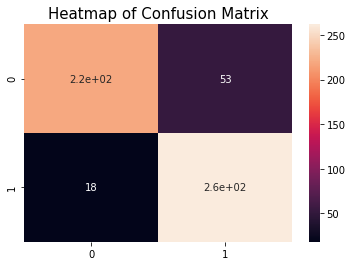

In [26]:
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, prediction_svm)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [27]:
# Cross validation
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = svm, X = x_train,y = y_train, cv = 10)
print("Cross validation accuracy of model = ", cross_validation)
print("\nCross validation mean accuracy of model = ", cross_validation.mean())

Cross validation accuracy of model =  [0.86486486 0.84615385 0.90045249 0.90045249 0.89140271 0.88235294
 0.8959276  0.88687783 0.90497738 0.85520362]

Cross validation mean accuracy of model =  0.8828665769842241


In [28]:
import pickle
pickle.dump(svm, open('model.pkl', 'wb'))
# load model
red_wine_quality_model = pickle.load(open('model.pkl', 'rb'))
# predict the output
y_pred = red_wine_quality_model.predict(x_test)
# confusion matrix
print('Confusion matrix of model: \n',confusion_matrix(y_test, y_pred),'\n')
# show the accuracy
print('Accuracy of  model = ',accuracy_score(y_test, y_pred))

Confusion matrix of model: 
 [[220  53]
 [ 18 262]] 

Accuracy of  model =  0.8716094032549728
